In [1]:
#import librariries for SVD to compress an image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




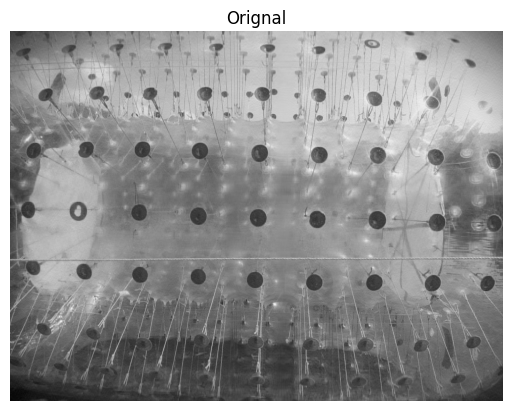

In [8]:
image = Image.open('dataset/image1.jpg') #load image
image = image.convert('L') #convert to grayscale
image = np.array(image) #convert to numpy array
plt.imshow(image_k, cmap='gray') #display the image
plt.title(f'Orignal') #title of the plot
plt.axis('off') #remove axis
plt.show() #show the plot


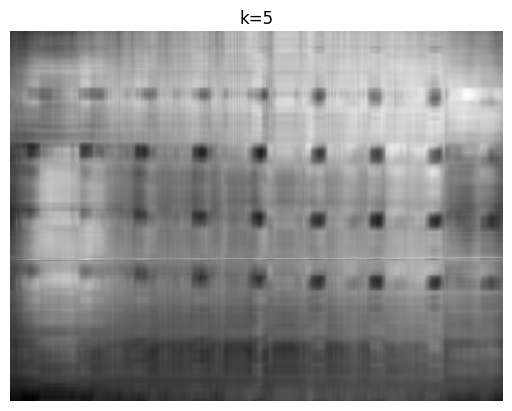

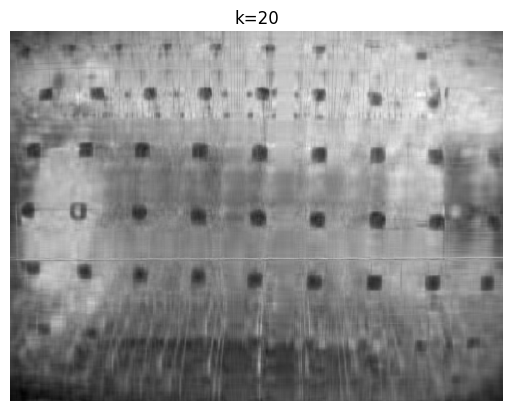

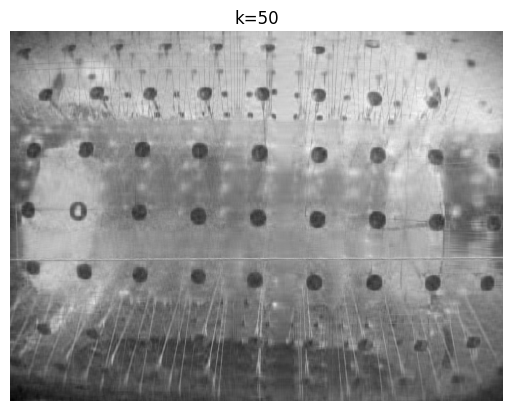

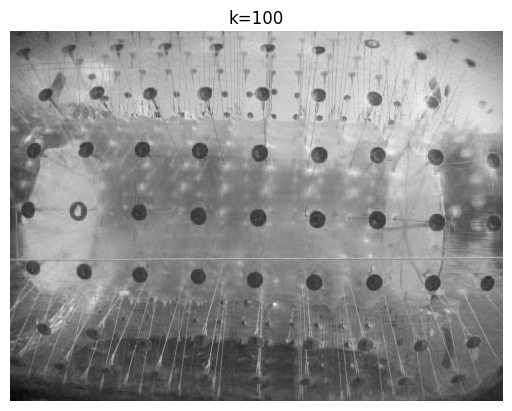

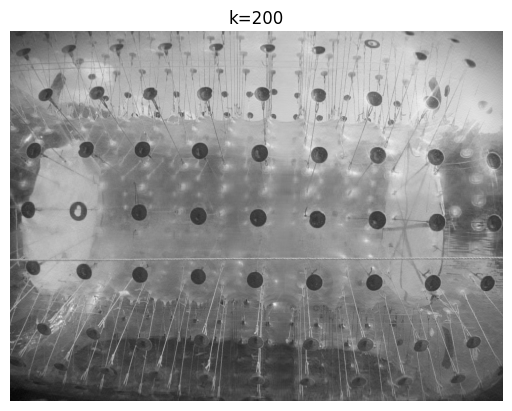

In [9]:
#svd
U, S, Vt = np.linalg.svd(image, full_matrices=False) #perform SVD
#keep only the first k singular values
k = [5,20,50,100,200] #number of singular values to keep
for i in k:
    #reconstruct the image using only the first k singular values
    S_k = np.zeros((i, i)) #create a zero matrix of size k x k
    np.fill_diagonal(S_k, S[:i]) #fill the diagonal with the first k singular values
    image_k = np.dot(U[:, :i], np.dot(S_k, Vt[:i, :])) #reconstruct the image
    plt.imshow(image_k, cmap='gray') #display the image
    plt.title(f'k={i}') #title of the plot
    plt.axis('off') #remove axis
    plt.show() #show the plot

In [12]:
#compare image with original image
def image_loss(original, compressed):
    #loss
     loss = np.linalg.norm(original - compressed) #calculate the loss
     return loss #return the loss

def reconstruction(U, S, Vt, k):
    #reconstruct the image using only the first k singular values
    S_k = np.zeros((k, k)) #create a zero matrix of size k x k
    np.fill_diagonal(S_k, S[:k]) #fill the diagonal with the first k singular values
    return np.dot(U[:, :k], np.dot(S_k, Vt[:k, :])) #reconstruct the image

def image_size(image):
    #calculate the size of the image
    return image.nbytes / (1024 * 1024) #size in MB

def compression_ratio(original, compressed):
    #calculate the compression ratio
    original_size = image_size(original) #size of original image
    compressed_size = image_size(compressed) #size of compressed image
    return original_size / compressed_size #compression ratio

#compare images
for i in k:
    image_k = reconstruction(U, S, Vt, i) #reconstruct the image
    loss = image_loss(image, image_k) #calculate the loss
    ratio = compression_ratio(image, image_k) #calculate the compression ratio
    print(f'k={i}, loss={loss}, compression ratio={ratio}') #print the loss and compression ratio


k=5, loss=89072.79329237848, compression ratio=0.125
k=20, loss=67143.58737884152, compression ratio=0.125
k=50, loss=53021.12721019774, compression ratio=0.125
k=100, loss=42052.68712963374, compression ratio=0.125
k=200, loss=31548.739870764468, compression ratio=0.125


# manually do svd using a small matrx


1. Create a Small Matrix

In [16]:
A = np.array([[3,1],[1,3]]) #create a small matrix
print("Matrix A")
print(A) #print the matrix


Matrix A
[[3 1]
 [1 3]]


2.compute manually the SVD of A

In [17]:
ATA = np.dot(A.T, A) #calculate the dot product of A and A transpose
print("A^T * A")
print(ATA) #print the dot product

A^T * A
[[10  6]
 [ 6 10]]


3. compute Eigen Values

In [18]:
#Eigen values and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(ATA) #calculate the eigen values and eigen vectors
print("Eigen values")
print(eigenvalues) #print the eigen values
print("Eigen vectors")
print(eigenvectors) #print the eigen vectors


Eigen values
[16.  4.]
Eigen vectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


4. take square Roots -> These are the Singular Values

In [20]:
singuar_values = np.sqrt(eigenvalues) #calculate the singular values
print("Singular values")
print(singuar_values) #print the singular values


Singular values
[4. 2.]


5. Compare with SVD

In [21]:
#use svd to get singular values
_, S, _ = np.linalg.svd(A) #perform SVD
print("Singular values using SVD")
print(S) #print the singular values
#compare the singular values
print("Singular values using eigen values")
print(singuar_values) #print the singular values

Singular values using SVD
[4. 2.]
Singular values using eigen values
[4. 2.]
